In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import warnings

style.use('ggplot')
sns.set(palette='terrain')

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('sc_stats.csv')
df.head()

,game_season,game_result,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,...,orb,drb,trb,ast,stl,blk,pf,tov,pts,plus_minus
0,1,L (-1),35:39,7,12,0.583,0,1,0.000,0,...,1,1,2,7,4,0,2,2,14,7
1,2,L (-22),39:05,5,9,0.556,2,3,0.667,0,...,0,2,2,4,1,0,5,3,12,-19
2,3,W (+8),28:27,3,6,0.500,1,2,0.500,0,...,0,5,5,9,2,0,4,1,7,-4
3,4,L (-28),21:32,1,5,0.200,0,1,0.000,3,...,0,1,1,3,0,0,6,0,5,-13
4,5,L (-13),31:15,4,8,0.500,1,2,0.500,0,...,1,3,4,6,0,0,4,5,9,-5


In [4]:
def convert_mp(mp):
    minutes, sec = mp.split(':')
    return int(minutes) + round(int(sec) / 60, 5)

In [5]:
df['time played'] = df['mp'].apply(lambda row: convert_mp(row))

In [6]:
def convert_game_season(gs):
    if gs < 27:
        return 'first'
    elif gs >= 27 and gs < 55:
        return 'second'
    else:
        return 'third'

In [7]:
df['gs_label_thirds'] = df['game_season'].apply(lambda row: convert_game_season(row))

In [8]:
df.drop(['mp', 'game_season', 'game_result'], axis=1, inplace=True)

In [9]:
df.head()

,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,...,trb,ast,stl,blk,pf,tov,pts,plus_minus,time played,gs_label_thirds
0,7,12,0.583,0,1,0.000,0,0,NaN,1,...,2,7,4,0,2,2,14,7,35.65000,first
1,5,9,0.556,2,3,0.667,0,0,NaN,0,...,2,4,1,0,5,3,12,-19,39.08333,first
2,3,6,0.500,1,2,0.500,0,0,NaN,0,...,5,9,2,0,4,1,7,-4,28.45000,first
3,1,5,0.200,0,1,0.000,3,4,0.75,0,...,1,3,0,0,6,0,5,-13,21.53333,first
4,4,8,0.500,1,2,0.500,0,2,0.00,1,...,4,6,0,0,4,5,9,-5,31.25000,first


In [10]:
df = df.fillna(0)

In [11]:
df.nunique()

fg                  21
fga                 33
fg_pct             115
fg3                 14
fg3a                21
fg3_pct             65
ft                  16
fta                 16
ft_pct              24
orb                  6
drb                 14
trb                 14
ast                 17
stl                  8
blk                  3
pf                   7
tov                 12
pts                 52
plus_minus          71
time played        531
gs_label_thirds      3
dtype: int64

In [12]:
df.isna().sum(axis=0)

fg                 0
fga                0
fg_pct             0
fg3                0
fg3a               0
fg3_pct            0
ft                 0
fta                0
ft_pct             0
orb                0
drb                0
trb                0
ast                0
stl                0
blk                0
pf                 0
tov                0
pts                0
plus_minus         0
time played        0
gs_label_thirds    0
dtype: int64

In [13]:
df_neg_pm = df[df['plus_minus'] <= 0]
df_pos_pm = df[df['plus_minus'] > 0]

In [14]:
offense = (df_neg_pm.select_dtypes(exclude='object').columns).tolist()
offense.remove('drb')
offense.remove('trb')
offense.remove('orb')
offense.remove('stl')
offense.remove('blk')
offense.remove('pf')

# These statistics are repetitive. I will use their 'made' versions of the respective statistics.
# fg3a, I will be using fg3 representing the number of 3 pointers Stephen Curry made in that game.
# fgta, I will be using ft representing the number of free throws Stephen Curry made in that game. 

offense.remove('fg3a')
offense.remove('fta')
offense.remove('plus_minus')

defense = ['stl', 'blk', 'pf', 'tov']
rebounds = ['orb', 'drb', 'trb']

# I will analyze with the game season label at the end.

In [15]:
offense, defense, rebounds

(['fg',
  'fga',
  'fg_pct',
  'fg3',
  'fg3_pct',
  'ft',
  'ft_pct',
  'ast',
  'tov',
  'pts',
  'time played'],
 ['stl', 'blk', 'pf', 'tov'],
 ['orb', 'drb', 'trb'])

# Offensive Features Analysis

In [16]:
fontsize = 12.5
width = 20
height = 35

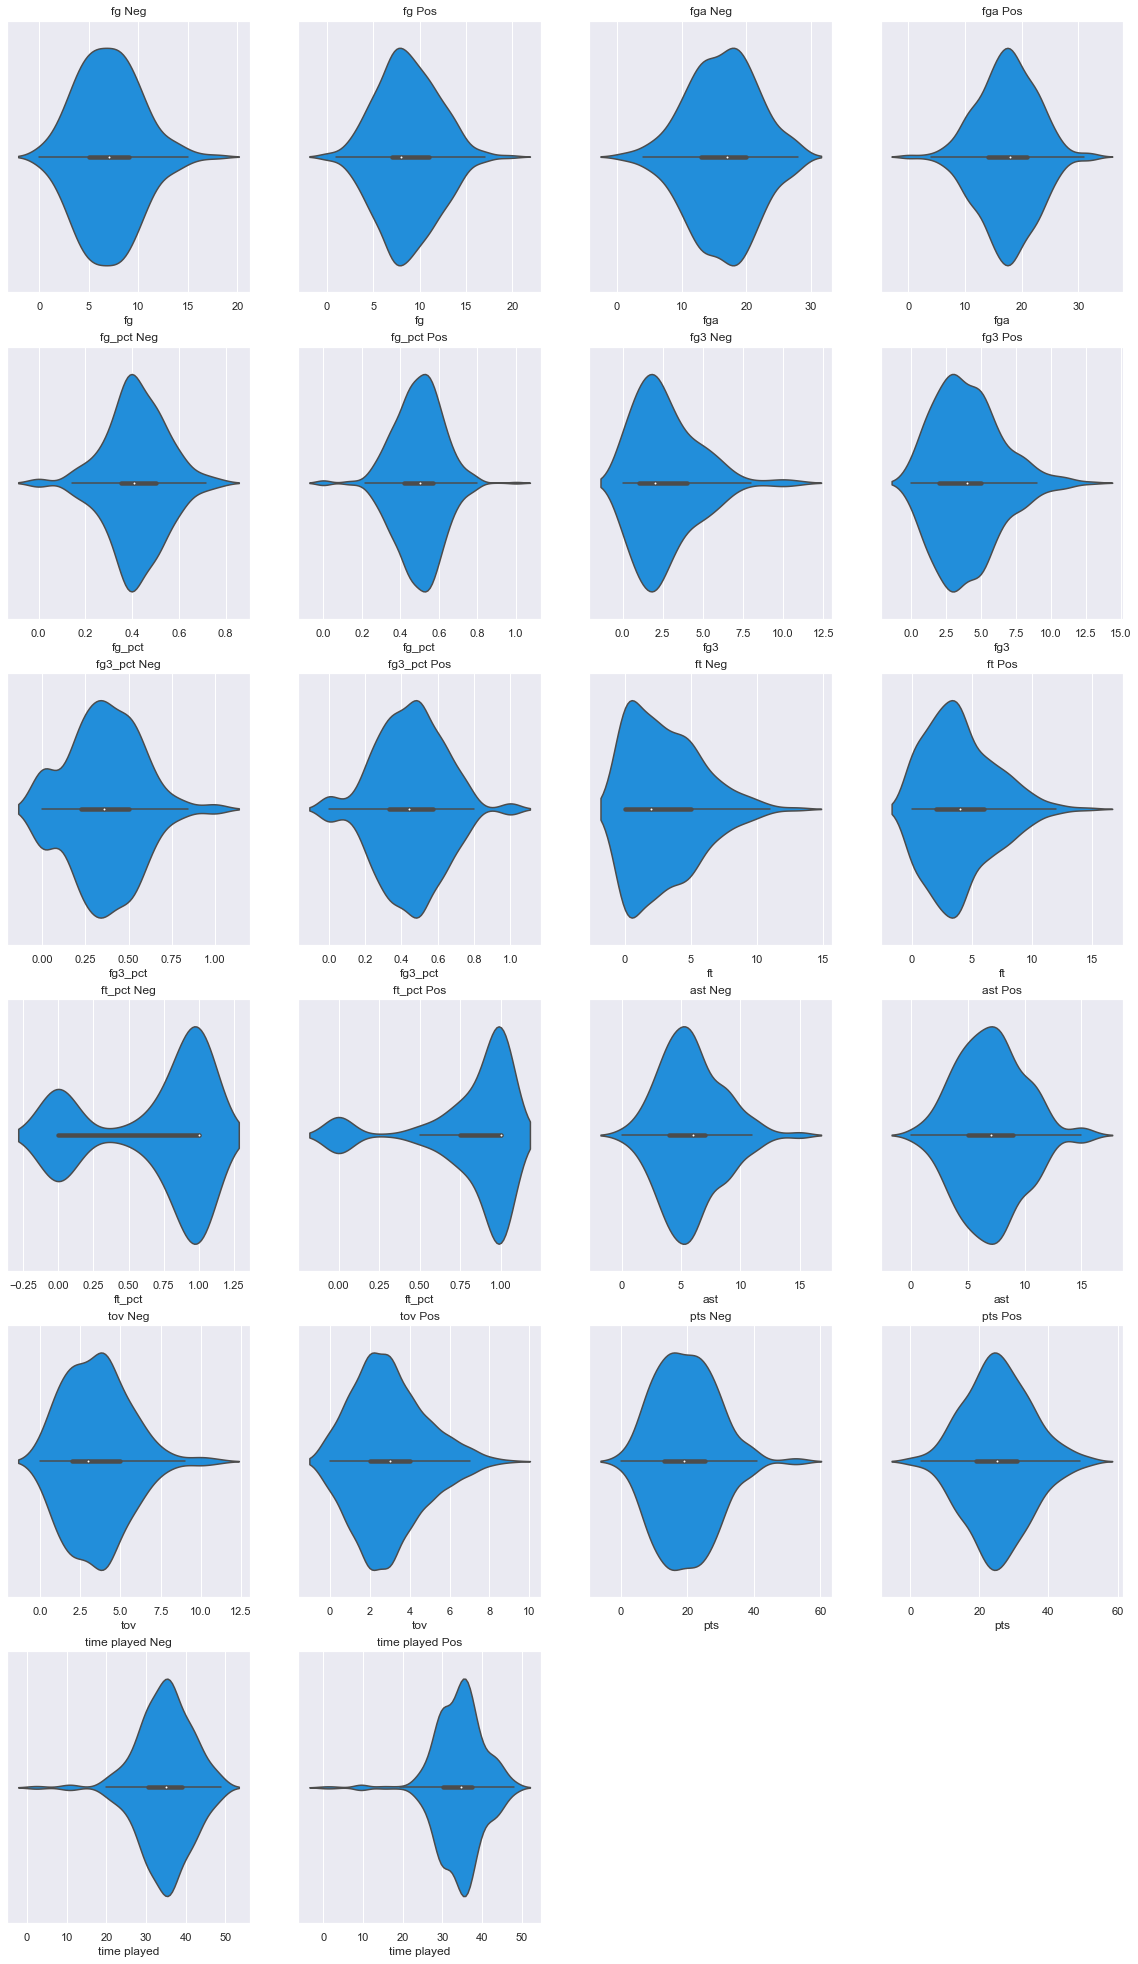

In [17]:
fig = plt.figure(1, figsize=(width, height))
i = 0

for col in offense:
    i += 1
    ax1 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.violinplot(x=df_neg_pm[col])
    ax1.set_title(f'{col} Neg')
    
    i += 1
    ax2 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.violinplot(x=df_pos_pm[col])
    ax2.set_title(f'{col} Pos')

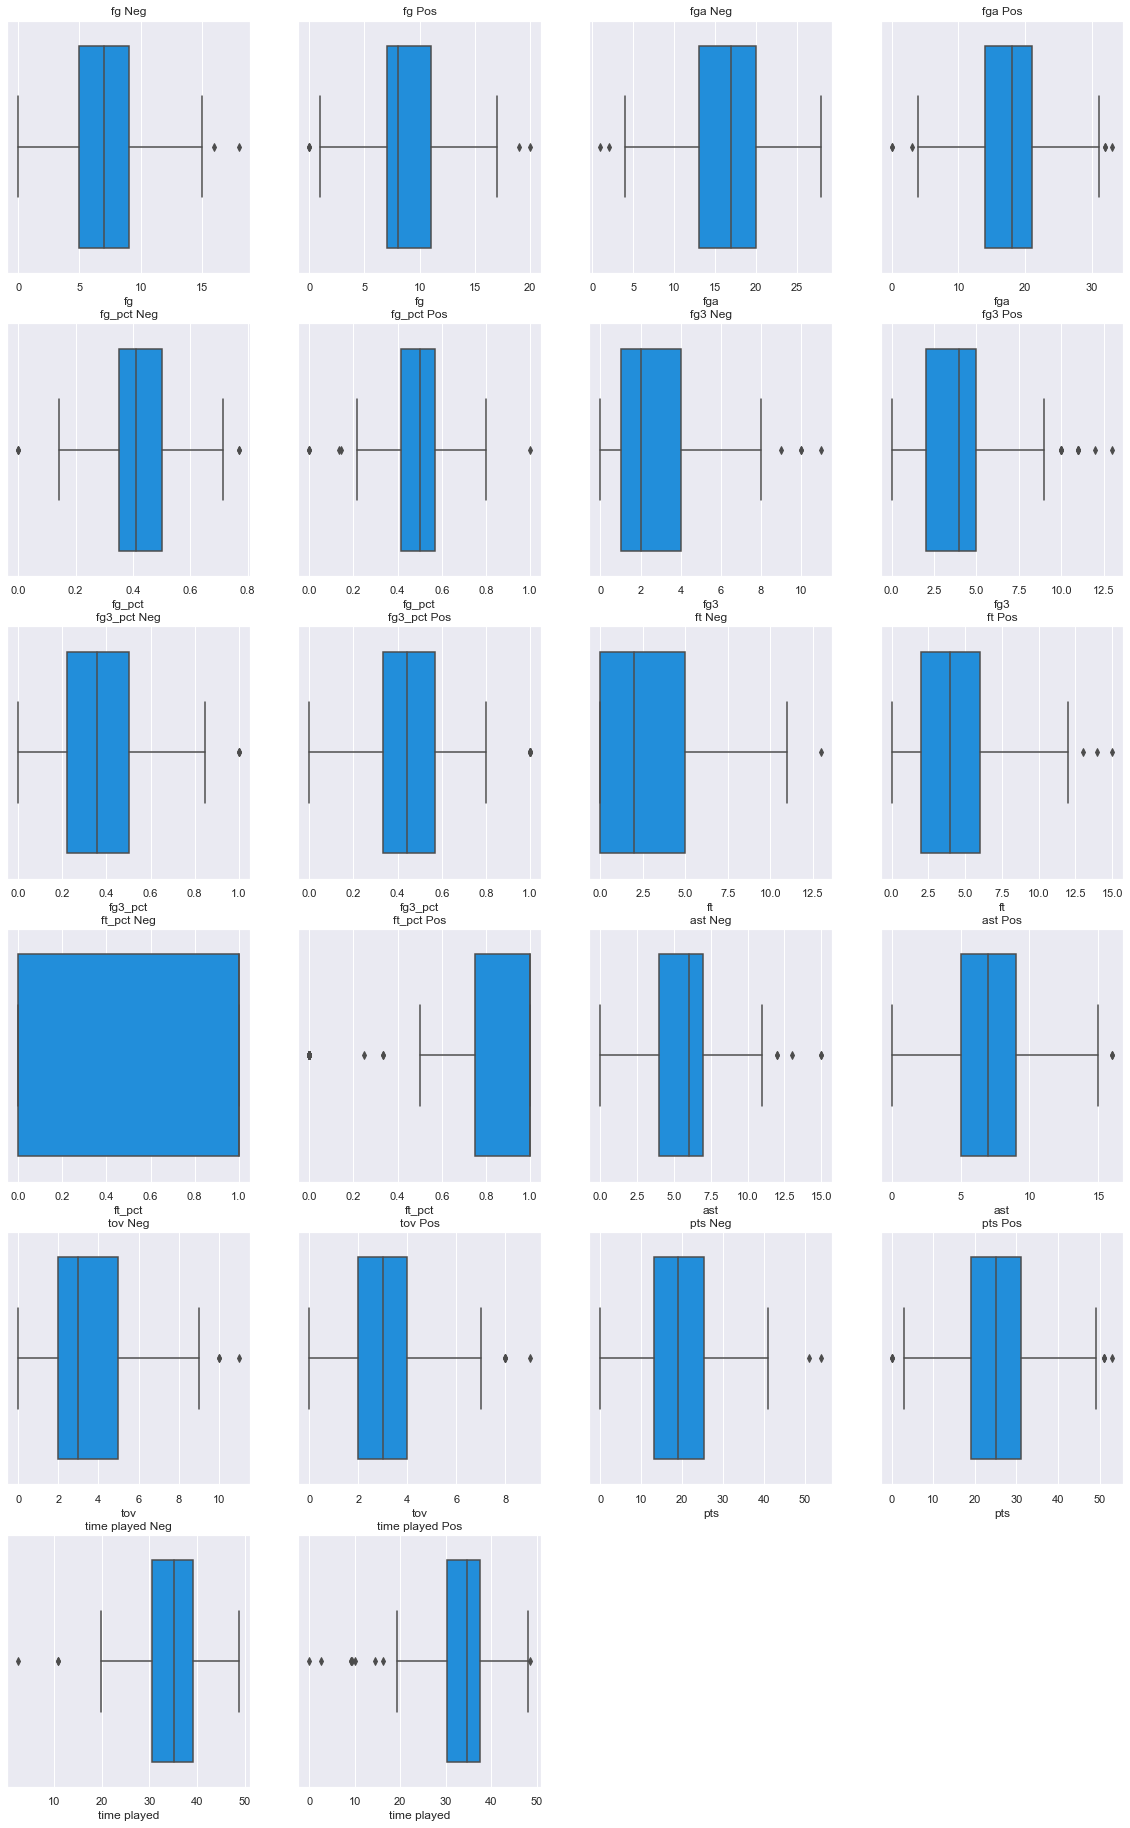

In [18]:
height = 32.5

fig = plt.figure(1, figsize=(width, height))
i = 0

for col in offense:
    i += 1
    ax1 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.boxplot(x=df_neg_pm[col])
    ax1.set_title(f'{col} Neg')
    
    i += 1
    ax2 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.boxplot(x=df_pos_pm[col])
    ax2.set_title(f'{col} Pos')

<h3>Insights for Violin and Box Plots</h3>
<br>
<li>Field Goals - Both graphs, respresenting the positive and negative plus/minus games, have a gaussian curve ranging from 0 to 20 field goals. If we look at the tip of the gaussian curves of each of the two graphs, the tip is slightly higher for the positive +/- graph than the negative +/- graph, although it is very slight. In the boxplot, the first and third quartiles are slightly higher, showing Curry tends to have make more field goals when he has a positive impact on the game than not.

<li>Field Goal Attempted - Looking at both the graphs, we see that both of them are close to being a gaussian distribution. There doesn't seem to be too much of a difference between the two graphs, implying that there isn't much difference between field goal attempts whether or not Stephen Curry has a positive or negative +/-. Even the boxplots are very similar for both, showing field goal attempts doesn't affect too much Curry's impact on the floor.
    
<li>Field Goal Percent - Looking at both of these graphs, there is more of a clear difference in the distributions. Although both have a gaussian curve, the mean is lower for when Curry have a negative +/-, lying at around 40%. The mean for when Curry has a positive plus/minus jumps to just around 50%, or slightly higher than that. This shows that how Curry is shooting the ball has a significant impact on his +/- on the floor. Looking the boxplots, the first quartile, median, and third quartile all are higher in the positive +/- boxplots than the negative one, showing that overall, when Curry tends to have a positive impact on the game when he shoots a higher shooting percent. 
    
<li>3 Pointers Made - Like we saw with the two fg% graphs, we see there is a visible difference between the 3 pointers made between the positive and negative +/- graphs. Both graphs are skewed right but the peak for the negative +/- graph is around 2 3-pointers whereas for the positive +/- graph, the peak lies at around 3 3-pointers. This further shows that how Curry is shooting the ball in the game significantly impacts his +/- in his time on the floor. The first quartile, median, and third quartile are all higher by 1 3-pointer in the positive boxplot than the negative, showing, once again, Curry's increased 3-point shooting tends to leave him having a positive impact on the game.
    
<li>3 Point % - In the negative +/- graph, we see there is a gaussian curve for the most part, although there is a second peak around 0-10% 3 point shooting. In the positive +/- graph, we see there is a guassian curve with some data points being on both sides of the curve. If we look at the main peak for each graph, we see the percentage for the negative +/- lies around 30% whilst it is at 50% for the positive +/- graph. The positive version of the graph is shifted towards higher percentages than the negative +/- curve, showing once again, a higher 3 shooting percentage leads to a higher chance of Curry having a positive +/- while he played. Like we saw in the 3 pointers made boxplots, the first quartile, median, and third quartile are all higher in the positive graph than the negative graph which shows that Curry's improved shooting does have a clearly more positive impact on the game. 
    
<li>Free Throws - In both the positive and negative graphs, we see there is a right skew since in most game, Curry shoots between 0-6 free throws and usually not much more than that. The one main difference to notice is what the most made free throws is for each graph. For the negative +/- graph, we see the most frequent count of made free throws is 0-1; however, for the positive +/- graph, it lies at around 3-4 free throws. This shows that, intuitively, the more free throws Curry makes, the higher chance he has of having a positive +/-. 
      
<li>Free Throw Percentage - Both the positive and negative +/- graphs seem to be a similar spread between 0% - 100% with a bimodal-ish distribution. The graphs are very similar so the difference between the two graphs don't tell much.
    
<li>Assists - Both the positive and negaitve +/- graphs for the assists have a guassian distribution. The spread is very similar; however, the distribution are around different values for each graph. For the negative +/- graph, it's around 5 assists whereas for the positive +/- curve, it's at around 7.5 assists showing the higher assists are more likely to leading Curry to having a positive +/- in his time played. The third quartile is much higher in the positive graph than the negative graph which shows that, like we saw in the violinplots, Curry's improved assists does have a solid impact on how he impacts the game, especially when has an above average game. 

<li>Turnovers - The positive and negative +/- curves, like the free throws, have very similar distributions. Since the graphs are very similar so they don't really tell any new information on seeing how Curry plays different between his positive and negative +/- game times played.

<li>Points - Both graphs for points have gaussian curves but one thing to note is the mean for the positive +/- graph is around 25 points compared to the 20 points for the negative +/- graph. This difference, once again, shows Curry's better shooting results in a more likely chance of him have a positive +/- in his time played. Looking at the boxplots, the first quartile, median, and third quartiles are all higher by almost 5 points, essentially shifting the boxplot to the right, which means Curry's scoring massively improves when he has a positive impact. Therefore, when Curry has a strong scoring game, he more than likely will have a positive impact on the game than a negative one
    
<li>Time Played - Stephen Curry played about the same number of minutes every game and is similarly distributed between both the positive and negative +/- graphs so this doesn't really tell any information.

In [20]:
df_neg_pm['ast_tov_ratio'] = df_neg_pm['ast'].div(df_neg_pm['tov'].replace(0, np.inf))
df_pos_pm['ast_tov_ratio'] = df_pos_pm['ast'].div(df_pos_pm['tov'].replace(0, np.inf))

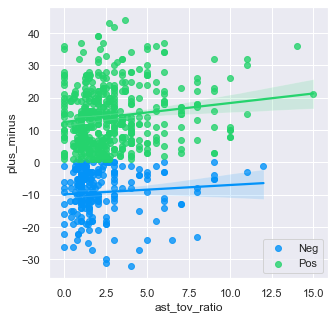

In [21]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['ast_tov_ratio'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['ast_tov_ratio'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

<h3>Insights</h3>
<br>
<li>We see that Curry tends to have a higher assist to turnover ratio in the games where he has a positive +/- when he played. 
<li>Below the y = 0, most of the data points are gathered between 0 - 3 assists per turnover whereas above y = 0, the data points are clustered between 0 and 4, even 5 assists per turnover. 
<li>We even see above y = 0, there are most data points that are out past the 10 assists per turnover range than below y = 0, which shows that when Curry has an outstanding game passing the ball, he more likely than not will have a positive +/- in the game. But for the most part, we see that the spread is slightly higher for above the y = 0 than below, showing the better job he does passing, the more likely he is to have a positive +/-.    

In [22]:
df_neg_pm['3fg_divided_by_fg'] = df_neg_pm['fg3'].div(df_neg_pm['fg'].replace(0, np.inf))
df_neg_pm['2fg_divided_by_fg'] = (df_neg_pm['fg'] - df_neg_pm['fg3']).div(df_neg_pm['fg'].replace(0, np.inf))

df_pos_pm['3fg_divided_by_fg'] = df_pos_pm['fg3'].div(df_pos_pm['fg'].replace(0, np.inf))
df_pos_pm['2fg_divided_by_fg'] = (df_pos_pm['fg'] - df_pos_pm['fg3']).div(df_pos_pm['fg'].replace(0, np.inf))

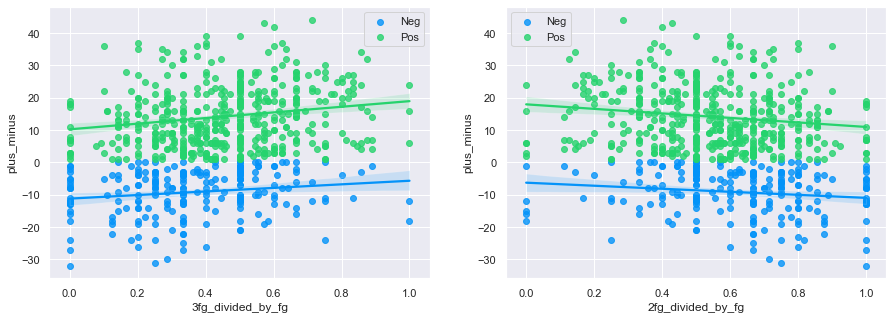

In [23]:
fig = plt.figure(1, figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['3fg_divided_by_fg'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['3fg_divided_by_fg'], df_pos_pm['plus_minus'], label='Pos')

ax1.legend()

ax2 = plt.subplot(1, 2, 2)

sns.regplot(df_neg_pm['2fg_divided_by_fg'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['2fg_divided_by_fg'], df_pos_pm['plus_minus'], label='Pos')

ax2.legend()

<h3>Insights</h3>
<br>
<li>These graphs are supposed to represent the percent of total shots taken by Curry that were either 3 pointers or 2 pointers. 
<li>In both graphs, the spread between above y = 0 and below y = 0 seems to be very similar, which doesn't tell us any new patterns indicating Curry's +/- results or impact on the game. One slight pattern we see are in the line of best fits. The line of best fits for the 3fg_divided_by_fg have positive slopes whereas the 2fg_divided_by_fg have negative slopes. This shows that the higher percentages of shots that were 3 pointers, the higher Curry's plus minus was in the game, and the opposite for the percent of shots that were 2 pointers. It should be notes this seems to be a weak relationship; however, it is a visibile relationship that can be noted.

In [24]:
df_neg_pm['pts_per_min'] = df_neg_pm['pts'] / df_neg_pm['time played']
df_pos_pm['pts_per_min'] = df_pos_pm['pts'] / df_pos_pm['time played']

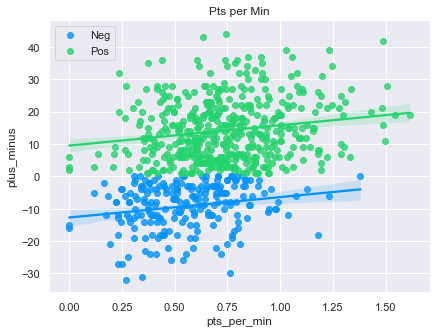

In [25]:
fig = plt.figure(1, figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['pts_per_min'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['pts_per_min'], df_pos_pm['plus_minus'], label='Pos')

ax1.set_title('Pts per Min')
ax1.legend()

<h3>Insights</h3>
<br>
<li>We see above the y = 0 line with positive +/-'s in the game, the distribution is shifted towards higher points per minute as opposed to below the y = 0 line. We see when Curry have a positive +/-, not only are the data points clustered between 0.25 to 1 points per minute, there are several more between 1 - 1.6 points per minute. When looking below y = 0, most the of the data points are clustered between 0.25 - 1 points per minute but not many after that. This shows that the more efficient and aggressive Curry is shooting and scoring the basketball, the more likely he is to have a positive plus minus in the game.

In [26]:
df_neg_pm['pts_per_fg'] = df_neg_pm['pts'] / df_neg_pm['fg']
df_pos_pm['pts_per_fg'] = df_pos_pm['pts'] / df_pos_pm['fg']

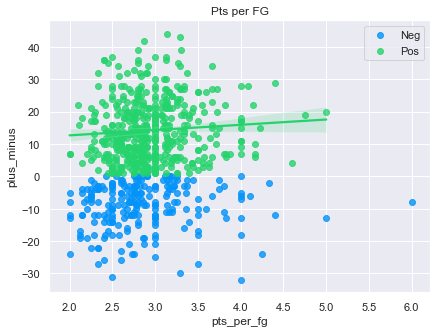

In [27]:
fig = plt.figure(1, figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['pts_per_fg'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['pts_per_fg'], df_pos_pm['plus_minus'], label='Pos')

ax1.set_title('Pts per FG')
ax1.legend()

<h3>Insights</h3>
<br>
<li>This graph plots the points per field goal for both types of games, when Curry has a positive or negative +/- in the game. 
<li>There is a clear increase in points per field goal when Curry has a positive impact compared to when he has a negative impact. Looking at below y = 0, we see most of the points are clustered between 2 - 3.5 points per field goal whereas above y = 0, the points cluster betwen 2.25 - 3.75 points per field goal.
<li>Overall, we see there are more points past x = 3.5 points per field goal abive y = 0 than below.
<li>This shows that the more efficient Curry is shooting the ball, the more likely he has a positive +/- in the game. 

In [28]:
df_neg_pm['FT+FG3'] = df_neg_pm['ft'] + df_neg_pm['fg3']
df_pos_pm['FT+FG3'] = df_pos_pm['ft'] + df_pos_pm['fg3']

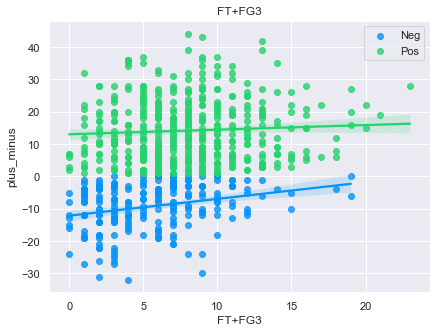

In [29]:
fig = plt.figure(1, figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['FT+FG3'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['FT+FG3'], df_pos_pm['plus_minus'], label='Pos')


ax1.set_title('FT+FG3')
ax1.legend()

<h3>Insights</h3>
<br>
<li>This graph plots the sum of the number of free throws and 3 pointers Curry makes in a game. 
<li>Up until around 12 free throws + 3 pointers, there seems to be an even distribution above and below y = 0; however, past this point, we see a lot of the data points lie above y = 0 than below. In other words, when Curry scores more than 12 free throws + 3 pointers, he is much more likely to have a positive +/- in the time he plays than having a negative plus minus. 

In [30]:
df_neg_pm['ppp'] = df_neg_pm['pts'] / (df_neg_pm['fga'] + 0.44 * df_neg_pm['fta'] + df_neg_pm['tov']).replace(0, np.inf)
df_pos_pm['ppp'] = df_pos_pm['pts'] / (df_pos_pm['fga'] + 0.44 * df_pos_pm['fta'] + df_pos_pm['tov']).replace(0, np.inf)

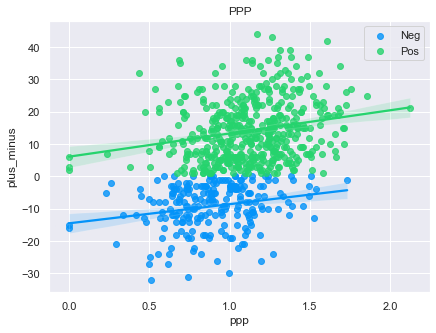

In [31]:
# Points per Possession.

fig = plt.figure(1, figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['ppp'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['ppp'], df_pos_pm['plus_minus'], label='Pos')


ax1.set_title('PPP')
ax1.legend()

<h3>Insights</h3>
<br>
<li>This graph plots the points per possession.
<li>Comparing above and below y = 0, Curry tends to have a higher points per possession when he has a positive impact on the game than when he doesn't. The spread of the data points above y = 0 is between 0.6 - 1.75 points per possession whereas the spread below y = 0 is between 0.4 - 1.5 points per possession. 
<li>Seeing the right shift above y = 0 than below, this graph indicates when Curry is more aggressive and efficient shooting the ball, he tends to have a better impact on the game than when he doesn't, another indication his offense plays a huge role in his impact on the floor.    

# Defensive Features Analysis

In [32]:
width = 16.5
height = 21.5

In [33]:
defense

['stl', 'blk', 'pf', 'tov']

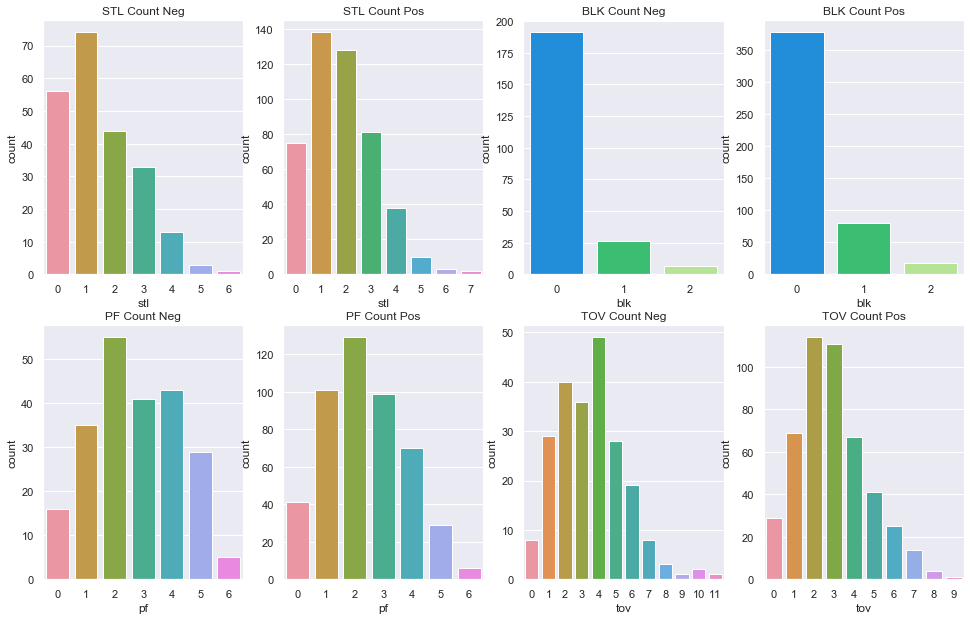

In [34]:
fig = plt.figure(1, figsize=(width, height))
i = 0

for col in defense:
    i += 1
    ax1 = plt.subplot(len(defense), 4, i)
    sns.countplot(df_neg_pm[col]) 
    ax1.set_title(f'{col.upper()} Count Neg')
    
    i += 1
    ax2 = plt.subplot(len(defense), 4, i)
    sns.countplot(df_pos_pm[col]) 
    ax2.set_title(f'{col.upper()} Count Pos')

<h3>Insights</h3>
<br>
<li>Steals - The distribution for both the positive and negative graphs seem to be similar; however, we see that in the positive graph, Curry tends to have a lot of more 2 and 3 steal games, proportionally to the other counts, than in the negative graph, showing higher steals seems to correlate more wiht a positive plus minus.
<li>Blocks - The distributions of the steals are very similar in both the positive and negative graphs, so these graphs don't give new information.
<li>Personal Fouls - Looking at the negative +/- graph, we see the counts for 3, 4, and 5 fouls is much higher proportionally in the negative graph than the positive. This shows that Curry committing more fouls correlates more with Curry having a negative +/- than positive. 
<li>Turnovers - The distributions of the blocks are similar in both graphs, hence not giving much new information.

In [35]:
df_neg_pm['stl_per_f'] = df_neg_pm['stl'] / df_neg_pm['pf']
df_pos_pm['stl_per_f'] = df_pos_pm['stl'] / df_pos_pm['pf']

df_neg_pm['blk_per_f'] = df_neg_pm['blk'] / df_neg_pm['pf']
df_pos_pm['blk_per_f'] = df_pos_pm['blk'] / df_pos_pm['pf']

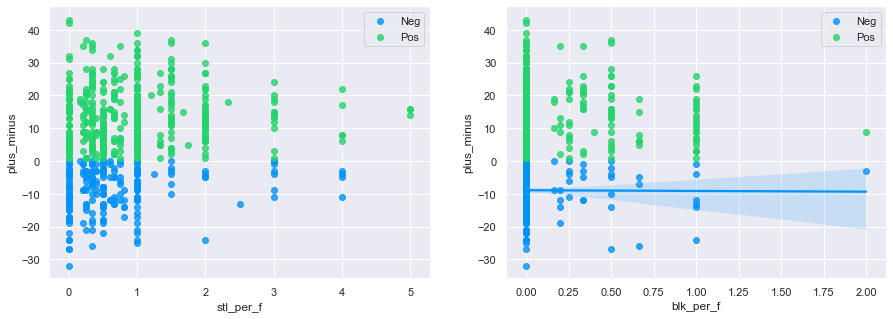

In [36]:
fig = plt.figure(1, figsize=(15, 5))
ax = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['stl_per_f'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['stl_per_f'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

ax2 = plt.subplot(1, 2, 2)

sns.regplot(df_neg_pm['blk_per_f'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['blk_per_f'], df_pos_pm['plus_minus'], label='Pos')

ax2.legend()

<h3>Insights</h3>
<br>
<li>Steals per Foul - When Curry gets 1.5 or more steals per foul, we can see those games, he tends to have a positive plus minus while he plays in the game than having a negative one. This graph shows that when Curry has an above average defensive game, he is much more likely to have a positive impact on the game. This difference is a lot more apparent than the difference in some of the offensive graphs above, which may indicate that Curry having an above average defensive game seems to have a higher impact on his plus minus than some of the offensive statistics.

<li>Blocks per Foul - When Curry gets 0.5 or more blocks per foul, like we saw with steals per foul, Curry tends to have a positive +/- in the game than having a negative +/- since there are a lot more data points above y = 0 than below. This once again, is a more apparent difference than some of the offensive graphs indicating that Curry having an above average defensive seems to have a higher impact on his plus minus than some  of his offensive statistics.

# Rebounds

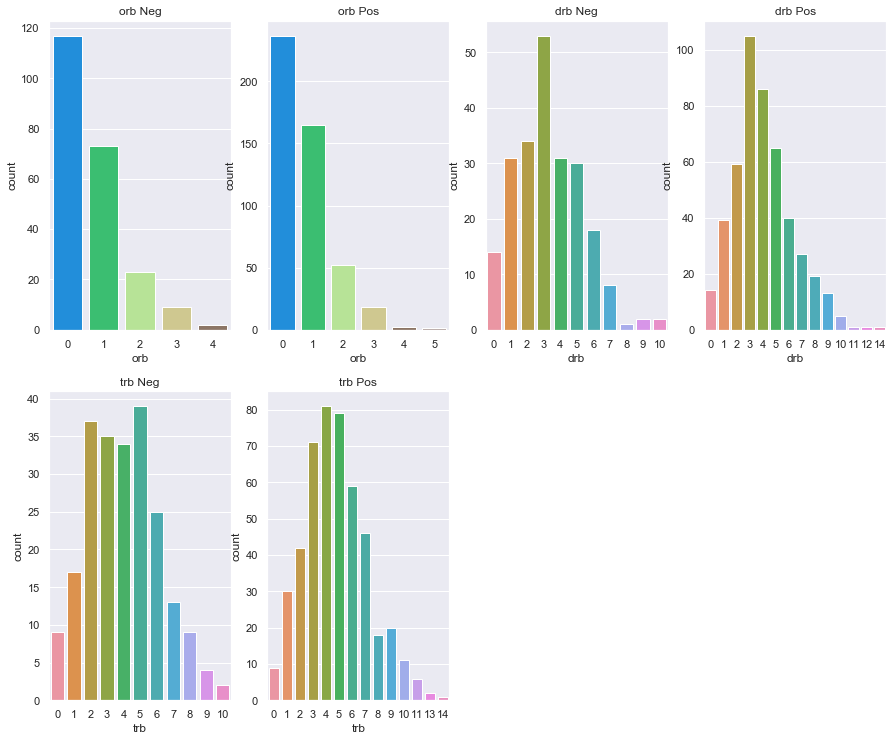

In [37]:
fig = plt.figure(1, figsize=(15, 12.5))
i = 0
rows = (len(rebounds) // 2) + 1

for rebound in rebounds:
    i += 1
    ax1 = plt.subplot(rows, 4, i)
    sns.countplot(df_neg_pm[rebound])
    ax1.set_title(f'{rebound} Neg')
    
    i += 1
    ax2 = plt.subplot(rows, 4, i)
    sns.countplot(df_pos_pm[rebound])
    ax2.set_title(f'{rebound} Pos')

<h3>Insights</h3>
<br>
<li>Looking at all these countplots and their respective halves, the distributions are very similar with maybe, higher statistics in a few games when Curry has a positive impact on the game, but other than that, there is not real significant improvement, showing rebounds doesn't seem to have an effect on Curry's impact in the game. 

In [38]:
df_neg_pm['orb_trb_ratio'] = df_neg_pm['orb'] / df_neg_pm['trb']
df_pos_pm['orb_trb_ratio'] = df_pos_pm['orb'] / df_pos_pm['trb']

df_neg_pm['drb_trb_ratio'] = df_neg_pm['drb'] / df_neg_pm['trb']
df_pos_pm['drb_trb_ratio'] = df_pos_pm['drb'] / df_pos_pm['trb']

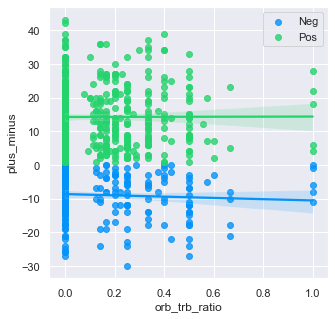

In [39]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['orb_trb_ratio'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['orb_trb_ratio'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

<h3>Insights</h3>
<br>
<li>Looking at the number of offensive rebounds to total rebounds as a percent, we don't really see much of a difference between above and below y = 0. In fact, the two halves seem almost like reflections of each other, indicating that the offensive rebound to total rebound percent/ratio of offensive to total rebounds doesn't seem to have an impact on Curry's overall +/- in the game.

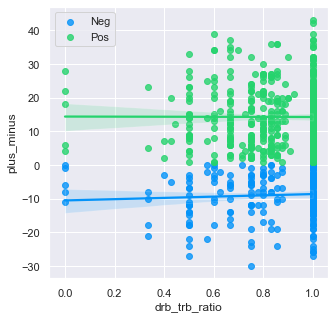

In [40]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['drb_trb_ratio'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['drb_trb_ratio'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

<h3>Insights</h3>
<br>
<li>Once again looking at the number of defensive rebounds to total rebounds as a percent, we don't really see much of a difference between above and below y = 0. Like the offensive to total rebounds percentage graph above, this indicates that the defensive rebound to total rebound percent/ratio doesn't seem to have an impact on Curry's overall +/- in the game either.

# Plus Minus Data Correlation Analysis

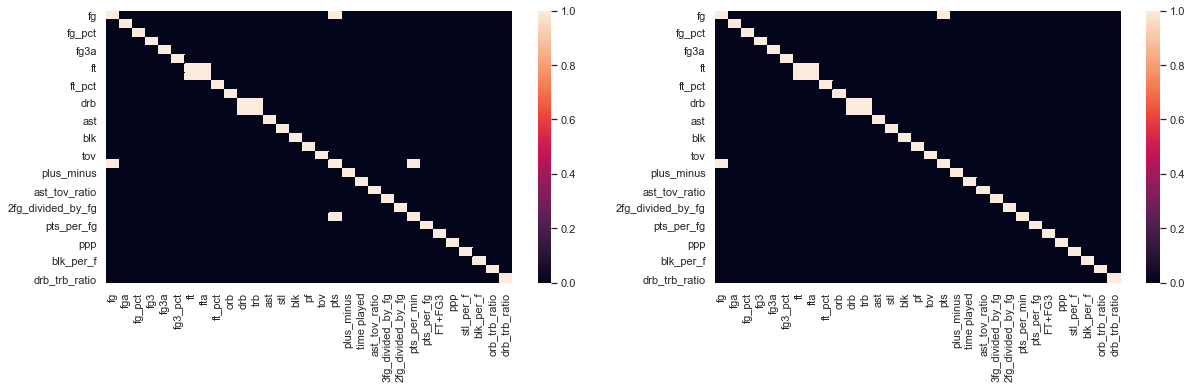

In [41]:
fig = plt.figure(figsize=(20, 5))
corr_cutoff = 0.9

ax = plt.subplot(1, 2, 1)
sns.heatmap(df_neg_pm.corr() > corr_cutoff)

ax = plt.subplot(1, 2, 2)
sns.heatmap(df_pos_pm.corr() > corr_cutoff)

In [42]:
# Created vs Lost Possessions.

df_pos_pm['net_pos_responsible_for'] = df_pos_pm['fg'] + df_pos_pm['ast'] + df_pos_pm['stl'] + df_pos_pm['blk'] - df_pos_pm['tov']
df_neg_pm['net_pos_responsible_for'] = df_neg_pm['fg'] + df_neg_pm['ast'] + df_neg_pm['stl'] + df_neg_pm['blk'] - df_neg_pm['tov']

Text(0.5, 1.0, 'Net Pos for Pos +/-')

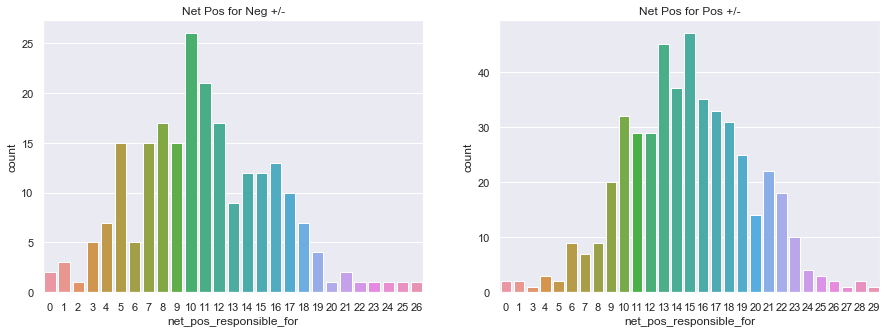

In [43]:
fig = plt.figure(1, figsize=(15, 5))
i = 0

ax = plt.subplot(1, 2, 1)
sns.countplot(df_neg_pm['net_pos_responsible_for'])
ax.set_title('Net Pos for Neg +/-')


ax = plt.subplot(1, 2, 2)
sns.countplot(df_pos_pm['net_pos_responsible_for'])
ax.set_title('Net Pos for Pos +/-')

<h3>Insights</h3>
<br>
<li>These two graphs are "net possessions a player is responsible for". In this equation, I added the possessions Curry had a positive result in, whether it's a score or an assists, and subtracted the turnovers in which he hurt the possession and compared the negative and positive plus minus halves to compare.
<li>To start off, we see that each graph has the bulk of the counts in the middle of the spread but where that bulk differs slightly between the graphs. 
<li>Looking at the negative graph, we see that bulk occurs between 7 - 18 net possessions in a game versus, in the positive graph, we see it lands between 9 - 23 possessions in a game. Although the bulks overlap, for one, we see thereis a much higher count in the positive graph than the negative. This shows that when Curry has between around 9 - 18 net possessions, he is more likely to have a postive impact. 
<li>The more important thing to see is that this spread is more to the right for the positive graph. This shows that in order to Curry to have a higher chance at having a positive impact, he has to make sure he is efficient and more importantly, focus on not causing turnovers since that leads to a higher net possession.    

# Game Season Analysis

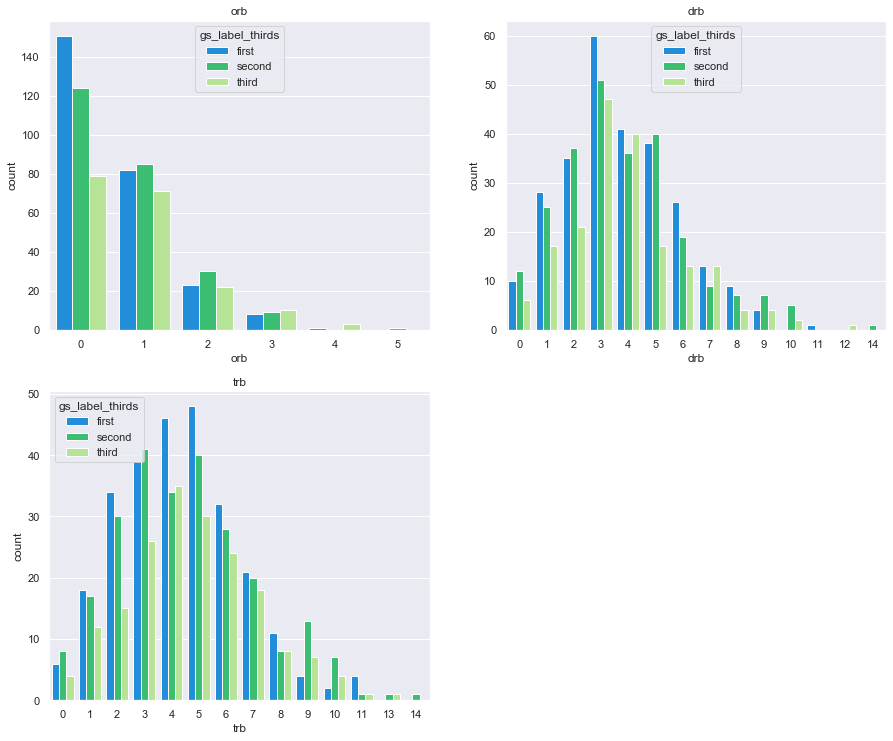

In [44]:
fig = plt.figure(1, figsize=(15, 12.5))
i = 0
rows = (len(rebounds) // 2) + 1

for rebound in rebounds:
    i += 1
    ax1 = plt.subplot(rows, 2, i)
    sns.countplot(df[rebound], hue=df['gs_label_thirds'])
    ax1.set_title(f'{rebound}')

<h3>Insights</h3>
<br>
<li>Offensive Rebounds - Aside from 0 offensive rebounds, we see the other counts are relatively uniform. Looking at the 0 rebound category, we see that count decreases as the season goes on; however, the other counts are significantly higher in the second and third thirds of the season. This shows that Curry possibly takes more games off in each third of the season to take more rest or maybe he has to sit out games due to an unfortunate injury. 
<li>Defensive and Total Rebounds - Looking at both these graphs, one commonality we usually see between most the counts is that it is the highest in the first third of the season. As the season goes on, for the most part, we see the counts for the second third of the season is higher than the last third but we also see in a few cases, those counts for the second and third thirds are equal to each other. We rarely see the count for the third third of the season be higher than the second third. We really only see that in the 7 defensive rebounds and 4 defensive rebound counts but not really anywhere else.

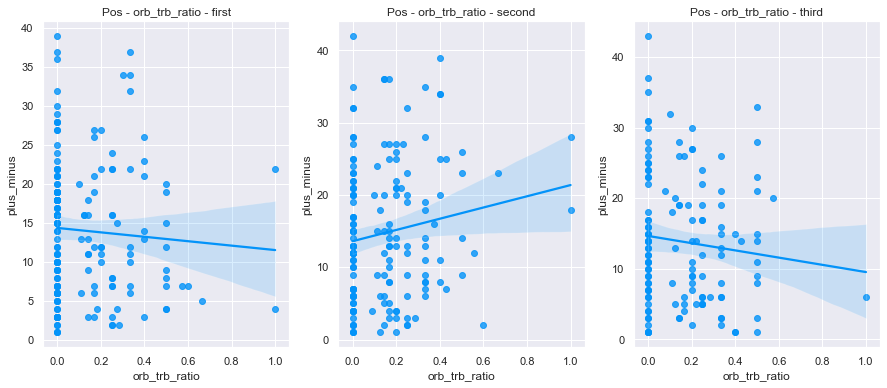

In [52]:
rebound_ratios = ['orb_trb_ratio']

fig = plt.figure(1, figsize=(15, 6))
i = 0

rows = len(rebound_ratios)

for ratio in rebound_ratios:
    for label in df['gs_label_thirds'].unique():
        i += 1
        ax = plt.subplot(rows, 3, i)
        data = df_pos_pm[df_pos_pm['gs_label_thirds'] == label]
        sns.regplot(x=ratio, y='plus_minus', data=data, label=label)
        ax.set_title(f'Pos - {ratio} - {label}') 

<h3>Insights</h3>
<br>
<li>In this graph, we analyze the offensive rebound to total rebound ratio in the positive and negative +/- graphs separately through huing by the third of a season. 
<li>Looking the positive +/- graphs, we see the spread of the graphs are very similar in each graph representing a different third of the season. Most of the data points are clustered between 0 - 0.6 for all the graphs, which shows that no matter the third of the season, when Curry has a positive impact, he tends to have consistent play.
<!-- <li>Looking at the negative plus minus graphs, however, we see Curry ratio in the negative +/- games are the worst in the first third of the season. He does tend to improve his statistics over the rest of the course of the season and seems to keep them pretty consistent.      -->

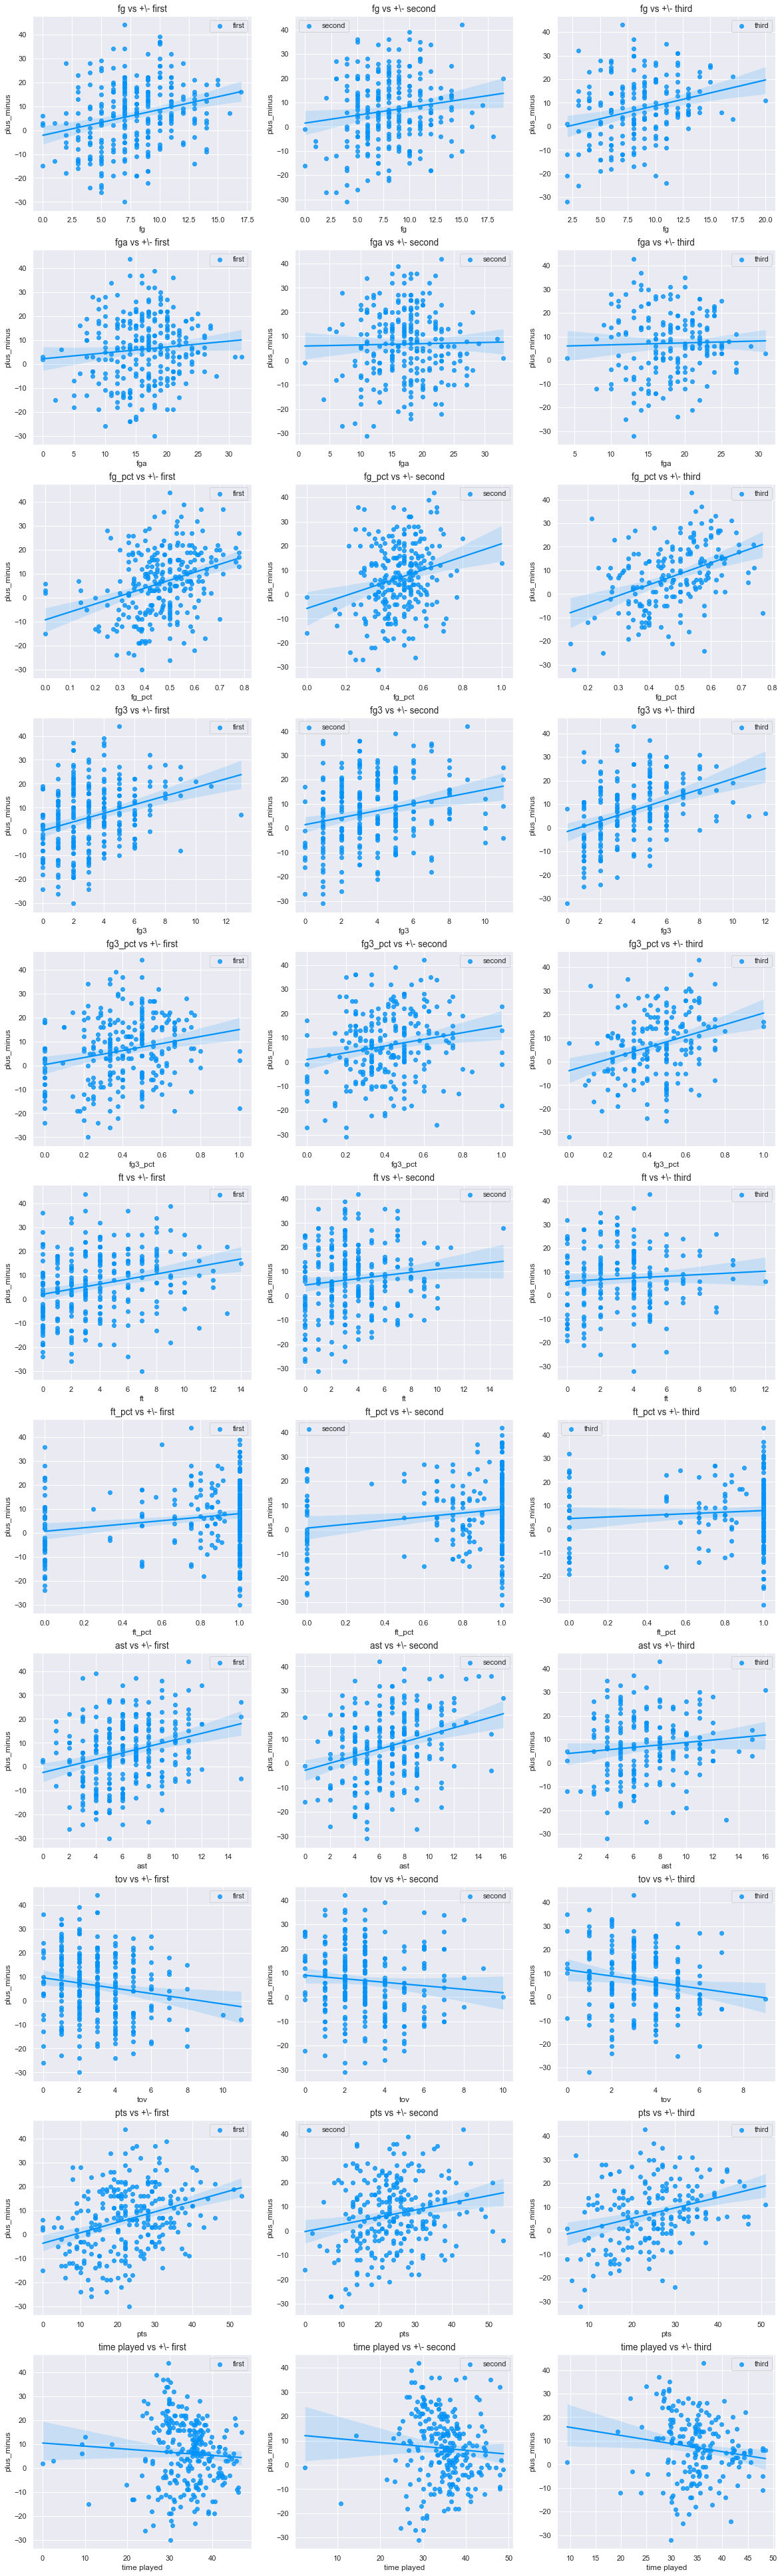

In [49]:
fontsize = 13.5

fig = plt.figure(1, figsize=(20, 70))
i = 0
rows = len(offense)

for col in offense:
    for label in df['gs_label_thirds'].unique():
        i += 1
        ax = plt.subplot(rows, 3, i)
        data = df[df['gs_label_thirds'] == label]
        sns.regplot(x=col, y='plus_minus', data=data, label=label)
    
        ax.set_title(f'{col} vs +\- {label}', fontsize=fontsize)
        ax.legend()

<h3>Insights</h3>
<br>
<li>Field Goals/ Field Goals Attempted - The spread for all the graphs are very similar ranging from 0 - 17 field goals made in a game and 0 - 30 field goals attempted in a game. This shows that over the course of Curry's career, he has managed to keep a consistent style of play made in each third of the season, showing this is one of his strong suits in his offensive game and that he is the same player game after game. 
    
<li>Field Goal Percent - Looking at field goal percentage, interestingly, Stephen Curry tends to shoot consistently in each third of the season throughout his career. This is impressive since one would expect this percentage to decrease over the course of the season. The spread range from around 20% - 80% with a few outliers in each graph. Like we saw in the field goals and field goals attempted, this consistency of play is a strong suit in Curry's game.
    
<li>3 Pointers Made - Although all 3 graphs make look similar, the bulk of the 3 pointer made in the first third of the season tends to lie between 0 - 7.5 without that many data points past that mark. Looking at the second third of the seasons, we see that number increases a lot more with a lot more points being after the 7.5 3 pointers made mark. This is likely due to the fact he is back into game shape. He does slightly slow down in the last third of the season, but that may be for a variety of reasons such as rest, minor injuries, or maybe him being physically more tired from the course of the season, yet it is not a huge difference, showing once again Curry's consistency throughout the season. 
    
<li>3 Point % - Unlike the 3 pointers made graphs, interestingly, we see Curry's shooting percentages from 3 remain largely consistent is each third of the season throughout his career with the spread being between mostly 0 - 80% shooting. In some of the other graphs we saw an improvement in the middle third of the season but not in this case, another testament to Curry's consistency throughout the course of the season.
    
<li>Free Throws - These graphs tell a different story than what we have been seeing before. Comparing the second and third thirds of the season, we see the spread is very simlar with Curry shooting between 0 to about 10 free throws in a game. However, Curry seems to be more aggressive going to the line in the first third of the season. We see there are a lot more data points past the 10 free throws in a game mark showing his increased intent to go to the line. This could be due to the fact he's trying to be more aggressive and getting back in shape but we clearly see how he approachs the game slightly different at the beginning of the season compared to the rest of it.
      
<li>Free Throw Percentage - Stephen Curry is a very consistent and capable free throw shooter so no matter which third of the season we look at, most of the data points are above 80%. There are some data points below that 80% mark, it should be notes a lot fewer than above the 80% mark, most likely because he shot few free throws and probably simply missed a couple.
    
<li>Assists - Curry's passing is pretty consistent throughout the thirds of the season ranging between 0 - 11 assists per game. One thing we should note is he has more games where he gets more than 11 assists in the second and third thirds of the season in his career. As he gets more into game shape, he begins to get more into a rhythm and has more games where he performs exceptionally.

<li>Turnovers - Comparing the graphs, gets the least amount of turnovers in the last third of the season compared to the first two thirds. Even though the bulk of the data points are between 0 and 6 turnovers in each of the graphs, he has far fewer games getting more than 6 turnovers in the middle of the season than the other two. 

<li>Points / Time Played - Curry is a consistent player scoring-wise and plays a similar amount of minutes through the seasons no matter what part of the season he's in, so comparing these graphs, we see there isn't too much of a difference between the thirds of the seasons in his career.

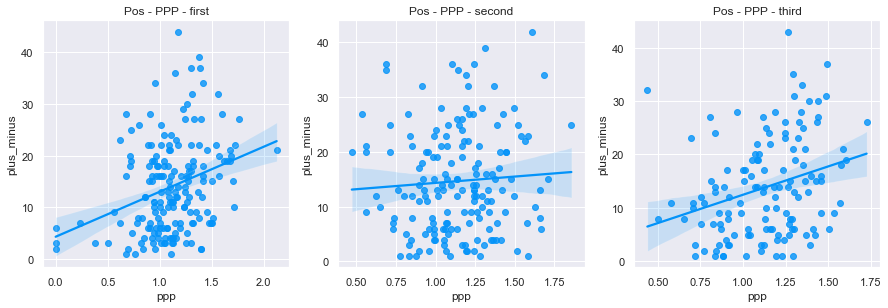

In [49]:
fig = plt.figure(1, figsize=(15, 10))
i = 0

for label in df['gs_label_thirds'].unique():
    i += 1
    ax = plt.subplot(2, 3, i)
    data = df_pos_pm[df_pos_pm['gs_label_thirds'] == label]
    sns.regplot(x='ppp', y='plus_minus', data=data, label=label)
    ax.set_title(f'Pos - PPP - {label}')  

<h3>Insights</h3>
<br>
<li>In this graph, we analyze the offensive rebound to total rebound ratio in the positive and negative +/- graphs separately through huing by the third of a season. 
<li>Comparing Curry's positive +/- splits by thirds, we see the spread of the data points are very similar. In all 3 graphs, the bulk of data points lie between 0.5 - 1.75 points per possession. This shows that Curry is a consistent player throughout the season and, at least in terms of points per possession, that when he is an aggressive scorer, no matter who they are playing or when, he has a good chance of having a positive impact on the game.

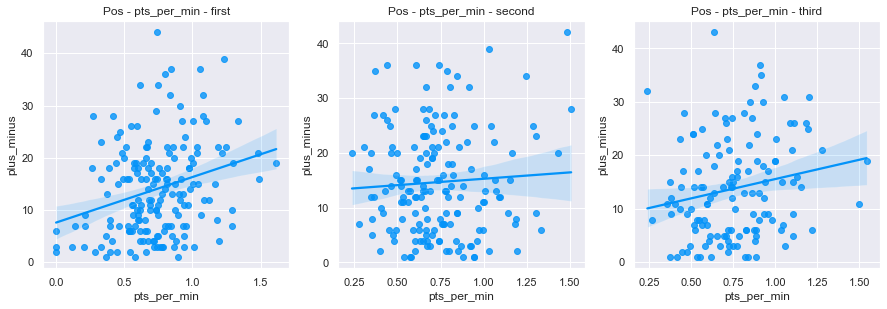

In [50]:
fig = plt.figure(1, figsize=(15, 10))
i = 0

for label in df['gs_label_thirds'].unique():
    i += 1
    ax = plt.subplot(2, 3, i)
    data = df_pos_pm[df_pos_pm['gs_label_thirds'] == label]
    sns.regplot(x='pts_per_min', y='plus_minus', data=data, label=label)
    ax.set_title(f'Pos - pts_per_min - {label}') 

<h3>Insights</h3>
<br>
<li>Looking at the different thirds of the game, we see that Curry has a slightly less points per minute in the last third of the season than the first two. In the first two, the spread goes from 0 - 1.5 points per minute and 0.25 - 1.5 points per minute, respectively, whereas in the last third, it goes from 0.25 - 1.25 points per minute. Although this is very slight, it shows that not only is Curry seemingly more aggressive and efficient shooting the ball in the first two thirds of the season, he doesn't have to be as tenacious in the last third of the season to have a postive impact on the game, most likely due to teams resting players or players naturally being more tired due to the number of games they have played.

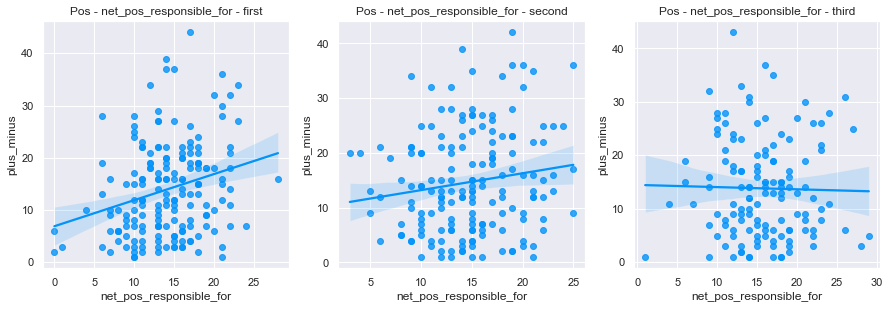

In [51]:
fig = plt.figure(1, figsize=(15, 10))
i = 0

for label in df['gs_label_thirds'].unique():
    i += 1
    ax = plt.subplot(2, 3, i)
    data = df_pos_pm[df_pos_pm['gs_label_thirds'] == label]
    sns.regplot(x='net_pos_responsible_for', y='plus_minus', data=data, label=label)
    ax.set_title(f'Pos - net_pos_responsible_for - {label}') 

<h3>Insights</h3>
<br>
<li>If you remember from earlier, this statistic is the net possessions of Stephen Curry, essentially the good possessions with field goals made and assists - the negative possessions(the turnovers) in a game. 
<li>The first and second thirds of the season have very similar spread between around 0 - 25 net possessions for Stephen Curry. This shows that in Curry's good games, he is pretty consistent in the first two thirds in the season, but in the last third, Curry seems to improve his game. Not only does spread essentially start at 5 net possessions, it end at almost 30 net possessions, a near 5 net possession improvement over the first two thirds of the season.
<li>This makes sense since Stephen Curry, like we saw, decreases the number of turnovers he has in a game over the course of the season, but also shows he tends to improve his game over the last stretch the season, most likely to get prepared for the playoffs.    